In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

#### Import Data

In [ ]:
df=pd.read_csv(r"cardekho_data.csv")
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### Data Cleaning

##### Check Duplicates

In [51]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool


In [52]:
df.dropna(inplace=True)

##### Boxplot

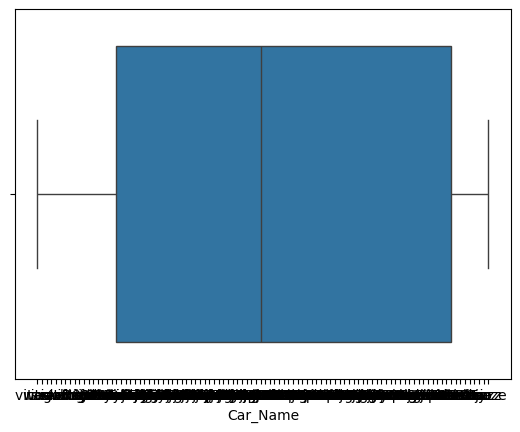

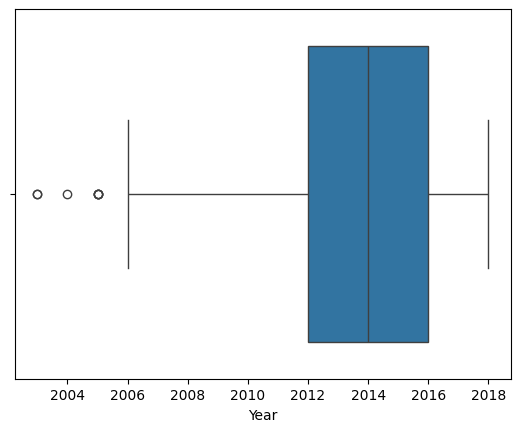

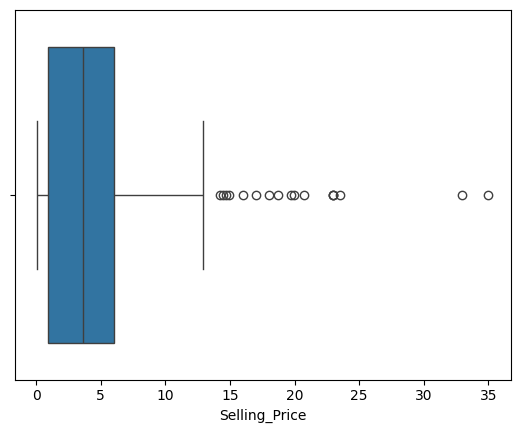

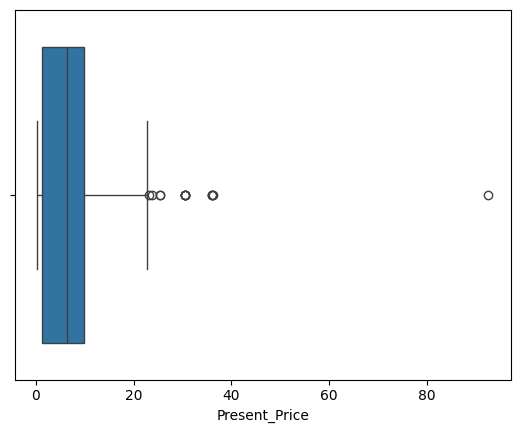

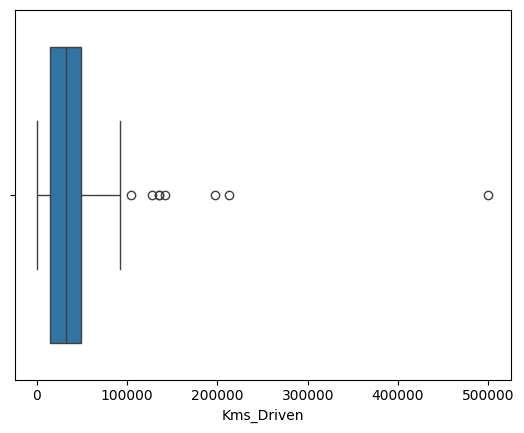

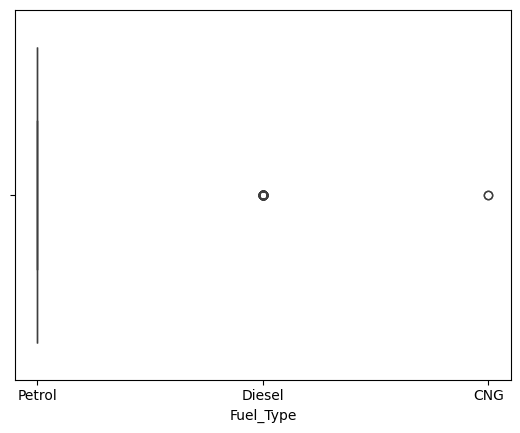

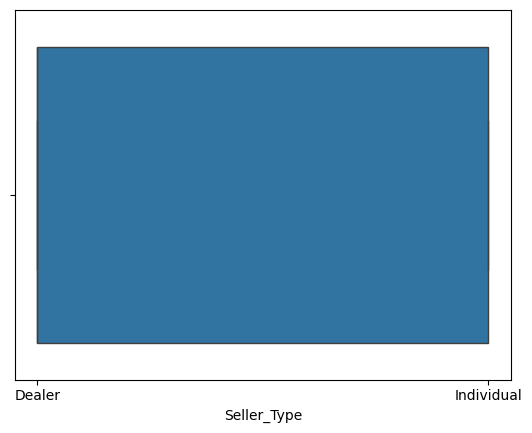

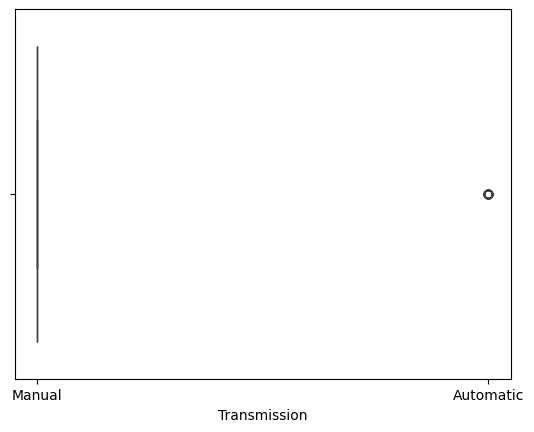

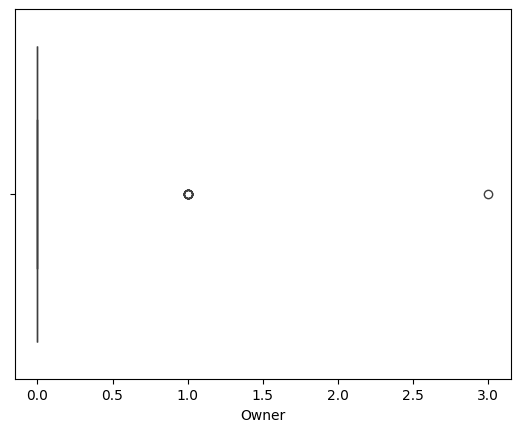

In [53]:
import seaborn as sns
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

##### Remove Outliers

In [54]:


# Function to remove outliers using the IQR method
def remove_outliers_iqr(df):
    cleaned_data = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:  # Only apply to numeric columns
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1                # Interquartile range

        # Calculate outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the column value is outside the bounds
        cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

# Remove outliers
cleaned_data = remove_outliers_iqr(df)

# Save the cleaned dataset
cleaned_data.to_csv("D:\\DATA SCIENCE\\PROJECT\\flood.csv", index=False)

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {cleaned_data.shape}")

Original data shape: (301, 9)
Cleaned data shape: (264, 9)


#### Extract Independent and Dependent Variable

In [55]:


# Separate numerical and categorical columns
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_columns = [col for col in df.columns if col not in categorical_columns + ['Car_Name']]

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-hot encoding (alternative to label encoding for categorical variables)
data_one_hot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display encoded data
print("Label Encoded Data:")
print(df.head())

print("\nOne-Hot Encoded Data:")
print(data_one_hot.head())


Label Encoded Data:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             1      0  
1            0             1      0  
2            0             1      0  
3            0             1      0  
4            0             1      0  

One-Hot Encoded Data:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  20

In [56]:
# Define the dependent and independent variables
dependent_variable = 'Selling_Price'
independent_variables = [col for col in df.columns if col != dependent_variable and col != 'Car_Name']  # Exclude non-relevant columns

# Create the X (independent) and y (dependent) datasets
X = df[independent_variables]
y = df[dependent_variable]

# Display the datasets
print("Independent Variables (X):")
print(X.head())

print("\nDependent Variable (y):")
print(y.head())

Independent Variables (X):
   Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0  2014           5.59       27000          2            0             1   
1  2013           9.54       43000          1            0             1   
2  2017           9.85        6900          2            0             1   
3  2011           4.15        5200          2            0             1   
4  2014           6.87       42450          1            0             1   

   Owner  
0      0  
1      0  
2      0  
3      0  
4      0  

Dependent Variable (y):
0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


#### scatterplot

<Axes: xlabel='Car_Name', ylabel='Selling_Price'>

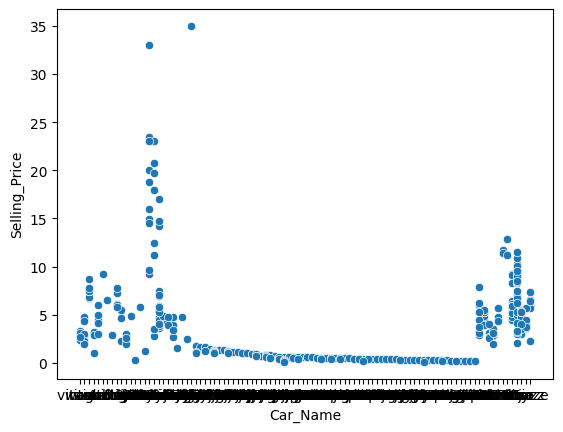

In [57]:
sns.scatterplot(x="Car_Name",y="Selling_Price",data=df)

#### Correlation

                   Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
Year           1.000000       0.236141      -0.047584   -0.524342  -0.053643   
Selling_Price  0.236141       1.000000       0.878983    0.029187  -0.509467   
Present_Price -0.047584       0.878983       1.000000    0.203647  -0.440415   
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  -0.166801   
Fuel_Type     -0.053643      -0.509467      -0.440415   -0.166801   1.000000   
Seller_Type   -0.039896      -0.550724      -0.512030   -0.101419   0.352415   
Transmission   0.000394      -0.367128      -0.348715   -0.162510   0.080466   
Owner         -0.182104      -0.088344       0.008057    0.089216   0.055705   

               Seller_Type  Transmission     Owner  
Year             -0.039896      0.000394 -0.182104  
Selling_Price    -0.550724     -0.367128 -0.088344  
Present_Price    -0.512030     -0.348715  0.008057  
Kms_Driven       -0.101419     -0.162510  0.089216  
Fuel_Type     

<Axes: >

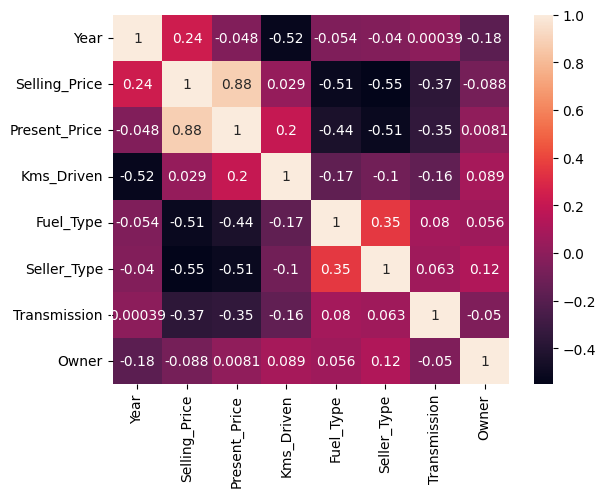

In [58]:
corre=df.corr(numeric_only=True)
print(corre)
sns.heatmap(corre,annot=True)

#### Split Train And Test Data

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### BuildModel

In [60]:

# Encode categorical variables
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define dependent and independent variables
dependent_variable = 'Selling_Price'
independent_variables = [col for col in df.columns if col != dependent_variable and col != 'Car_Name']

X = df[independent_variables]
y = df[dependent_variable]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Model Coefficients: [ 3.63622678e-01  4.39942393e-01 -5.46717653e-06 -1.32389894e+00
 -1.16866879e+00 -1.63644708e+00 -9.20154941e-01]
Model Intercept: -726.3997031143133
Mean Squared Error: 3.528927253898143
R-squared Score: 0.8468053957654174


#### Accuracy

In [61]:
accuracy=r2_score(y_test,y_pred)*100
print(accuracy)

84.68053957654173


In [62]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [63]:
lr = LinearRegression()
lr.fit(x_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
xgb= XGBRegressor()
xgb.fit(x_train,y_train)
# Prediction on the dataset
y_predict1 = lr.predict(x_test)

y_predict3 = gb.predict(x_test)
y_predict4 = xgb.predict(x_test)
# Evaluating
from sklearn import metrics
scorelr = metrics.r2_score(y_test,y_predict1)

scoregb = metrics.r2_score(y_test,y_predict3)
scorexgb = metrics.r2_score(y_test,y_predict4)
print(scorelr,scoregb,scorexgb)

0.8468053957654174 0.9710963398148905 0.961328200703924
